In [12]:
#Les imports 

import pandas as pd
import urllib.request
import zipfile
from tqdm import tqdm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

df_metro = pd.read_csv("data_polution.csv")
lim_metropole = [-5, 10, 41, 52]

#normallement on utilise ça, la je triche je redef la fonction
# from ensae2019 import plot_geo_time_value, plot_gif_geo_time_value
def plot_geo_time_value(x, y, year, value,  axs=None, name='', hue='', **kwargs):
    """
    Visualise l'évolution temporelle d'une donnée numérique
    géolocalisée.

    :param x: longitudes (vecteur)
    :param y: latitudes (vecteur)
    :param year: années (vecteur)
    :param value: valeurs numériques à représenter (DataFrame ou numpy array de taille n_observations * n_years)
    :param axs: axes matplotlib sur lesquels tracer (vecteur ou numpay array)
    :param name: noms des lieux  (vecteur)
    :param hue: sens de la valeur numérique (:math:`CO_2`, Ammoniac, ...)
    :param kwargs: paramètres additionnels
    """
    i=0
    for ax1 in axs :
        for ax in ax1 :
            ax.set_extent(lim_metropole)
            ax.add_feature(cfeature.OCEAN.with_scale('50m'))
            ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
            ax.add_feature(cfeature.RIVERS.with_scale('50m'))
            ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
            ax.scatter(x, y, s=value.iloc[:,i] ** 0.5 / 5, alpha=0.5)
            if hue!= '':
                ax.set_title(name+ " " + str(year[i])+": Quantité de "+ str(hue))
            else:
                ax.set_title(name+ " " + str(year[i]))
            i=i+1
    plt.savefig("figure.pdf")
    
def plot_gif_geo_time_value(x, y, year, value,  axs=None, name='', hue='', **kwargs): #in progress
    """
    Visualise l'évolution temporelle d'une donnée numérique
    géolocalisée.

    :param x: longitudes (vecteur)
    :param y: latitudes (vecteur)
    :param year: années (vecteur)
    :param value: valeurs numériques à représenter (DataFrame ou numpy array de taille n_observations * n_years)
    :param axs: axes matplotlib sur lesquels tracer (vecteur ou numpay array)
    :param name: noms des lieux  (vecteur)
    :param hue: sens de la valeur numérique (:math:`CO_2`, Ammoniac, ...)
    :param kwargs: paramètres additionnels
    """
    i=0
    for ax1 in axs :
        for ax in ax1 :
            ax.set_extent(lim_metropole)
            ax.add_feature(cfeature.OCEAN.with_scale('50m'))
            ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
            ax.add_feature(cfeature.RIVERS.with_scale('50m'))
            ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
            ax.scatter(x, y, s=value.iloc[:,i] ** 0.5 / 5, alpha=0.5)
            if hue!= '':
                ax.set_title(name+ " " + str(year[i])+": Quantité de "+ str(hue))
            else:
                ax.set_title(name+ " " + str(year[i]))
            i=i+1
    

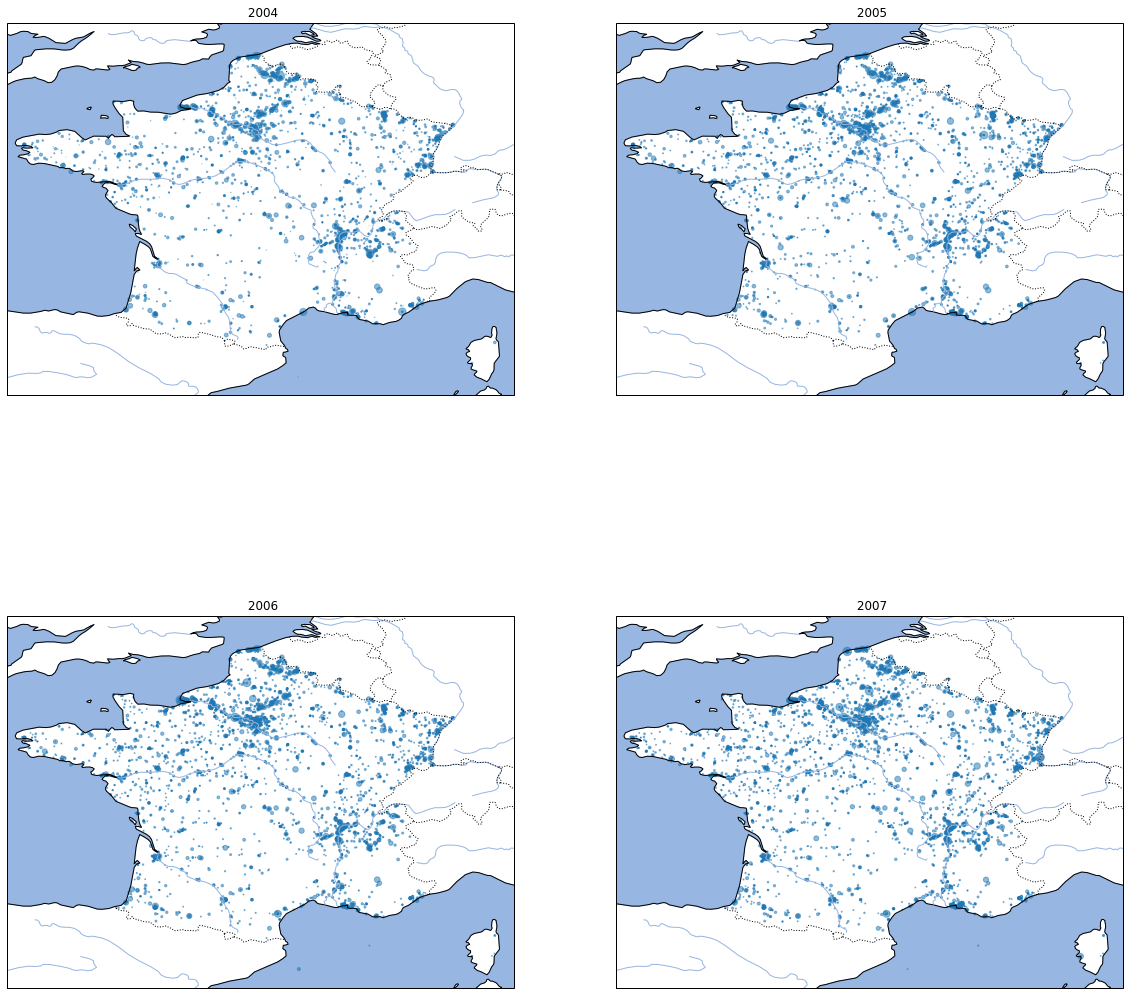

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20,20), subplot_kw={'projection': ccrs.PlateCarree()})


x, y = df_metro['LLX'], df_metro['LLY']
years = range(2004, 2008)

years_str = [str(year) for year in years]
values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] in years_str]].astype('float')
#values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] ==str(2008)]].astype('float')

#plot_geo_time_value(x, y, year=years, value=values, proj='mercator', axs=axs)
plot_geo_time_value(x, y, year=years, value=values, proj='mercator', axs=axs)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})

x, y = df_metro['LLX'], df_metro['LLY']
years = range(2003, 2018)

years_str = [str(year) for year in years]
values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] in years_str]].astype('float')

plot_gif_geo_time_value(x, y, value=values, year=years, fig=fig, ax=ax, proj='plate', method='webm')

In [2]:
from ensae2019 import plot_geo_time_value

## Présentation de notre module 

Dans ce notebook, nous allons faire une présentation de notre module et une visualistation de données spatiales. 

## Les données 

Nous allons utilisé les [Données sur les émissions polluantes (IREP)](http://www.georisques.gouv.fr/dossiers/irep/telechargement). 


Nous avons traité les données afin d'obtenir la bonne projection en suivant ce [notebook](https://nbviewer.jupyter.org/github/gabsens/Python-for-Data-Scientists-ENSAE/blob/master/Devoir/IREP%20et%20devoir.ipynb).


Et nous avons enregistré ces données en tant que fichier `'data/data_polution.csv'`

In [1]:
import pandas as pd 

df_metro = pd.read_csv("data/data_polution.csv")
lim_metropole = [-5, 10, 41, 52]

## L'imporation des modules 

In [3]:
from ensae2019 import plot_geo_time_value # nos fonctions 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## La fonction plot_geo_time_value

Voici un exemple d'utilisation de cette fonction, les images générées sont egalement enregistrées en tant que fichier *pdf*

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


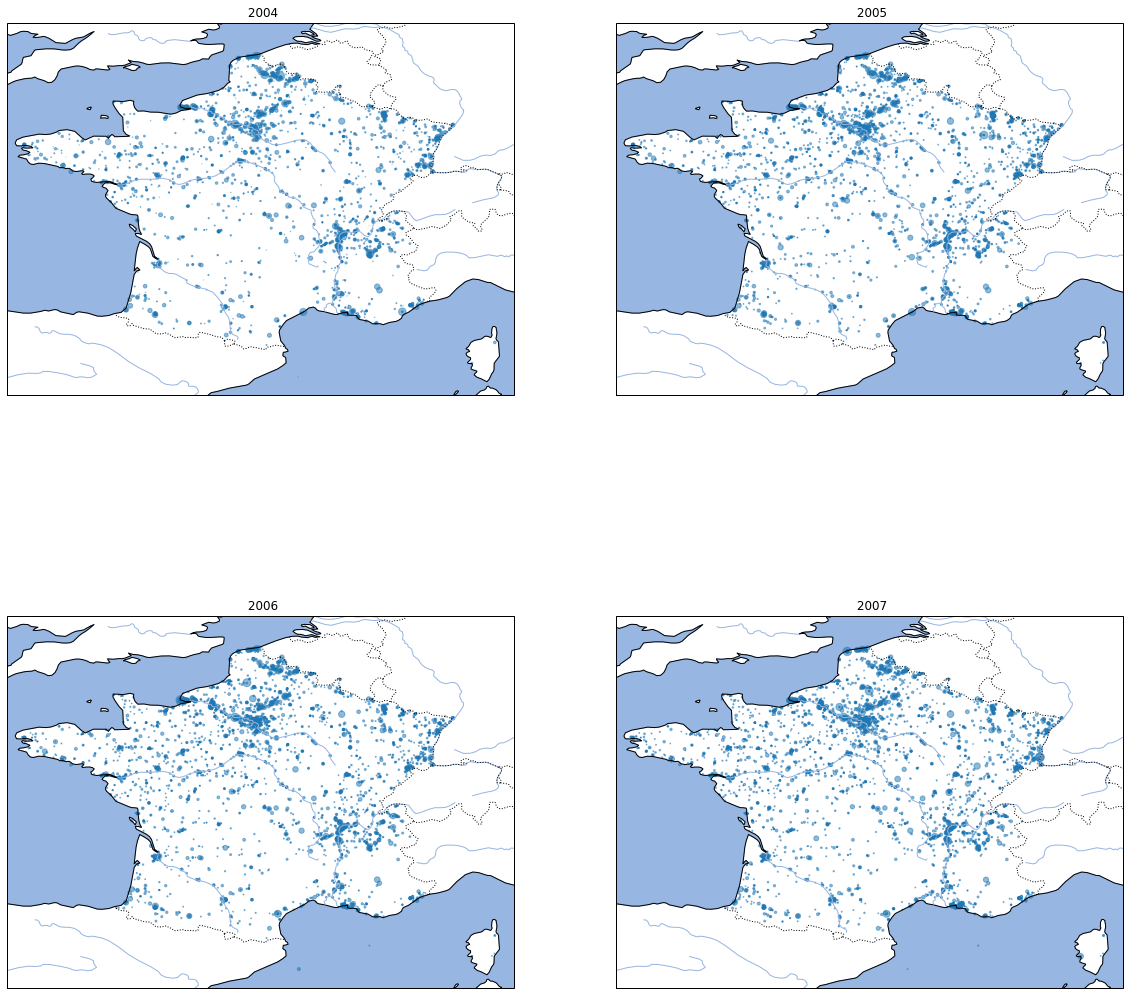

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(20,20), subplot_kw={'projection': ccrs.PlateCarree()})

x, y = df_metro['LLX'], df_metro['LLY']
years = range(2004, 2008)
years_str = [str(year) for year in years]
values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] in years_str]].astype('float')
plot_geo_time_value(x, y, year=years, value=values, proj='mercator', axs=axs)

## La fonction plot_gif_geo_time_value

In [5]:
    
def plot_gif_geo_time_value(x, y, year, value,  axs=None, name='', hue='', **kwargs): #in progress
    """
    Visualise l'évolution temporelle d'une donnée numérique
    géolocalisée.

    :param x: longitudes (vecteur)
    :param y: latitudes (vecteur)
    :param year: années (vecteur)
    :param value: valeurs numériques à représenter (DataFrame ou numpy array de taille n_observations * n_years)
    :param axs: axes matplotlib sur lesquels tracer (vecteur ou numpay array)
    :param name: noms des lieux  (vecteur)
    :param hue: sens de la valeur numérique (:math:`CO_2`, Ammoniac, ...)
    :param kwargs: paramètres additionnels
    """
    i=0
    for ax1 in axs :
        for ax in ax1 :
            ax.set_extent(lim_metropole)
            ax.add_feature(cfeature.OCEAN.with_scale('50m'))
            ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
            ax.add_feature(cfeature.RIVERS.with_scale('50m'))
            ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
            ax.scatter(x, y, s=value.iloc[:,i] ** 0.5 / 5, alpha=0.5)
            if hue!= '':
                ax.set_title(name+ " " + str(year[i])+": Quantité de "+ str(hue))
            else:
                ax.set_title(name+ " " + str(year[i]))
            i=i+1

IndentationError: expected an indented block (<ipython-input-5-e25c1c4f22e9>, line 15)